## Code to web scrap from NEA website

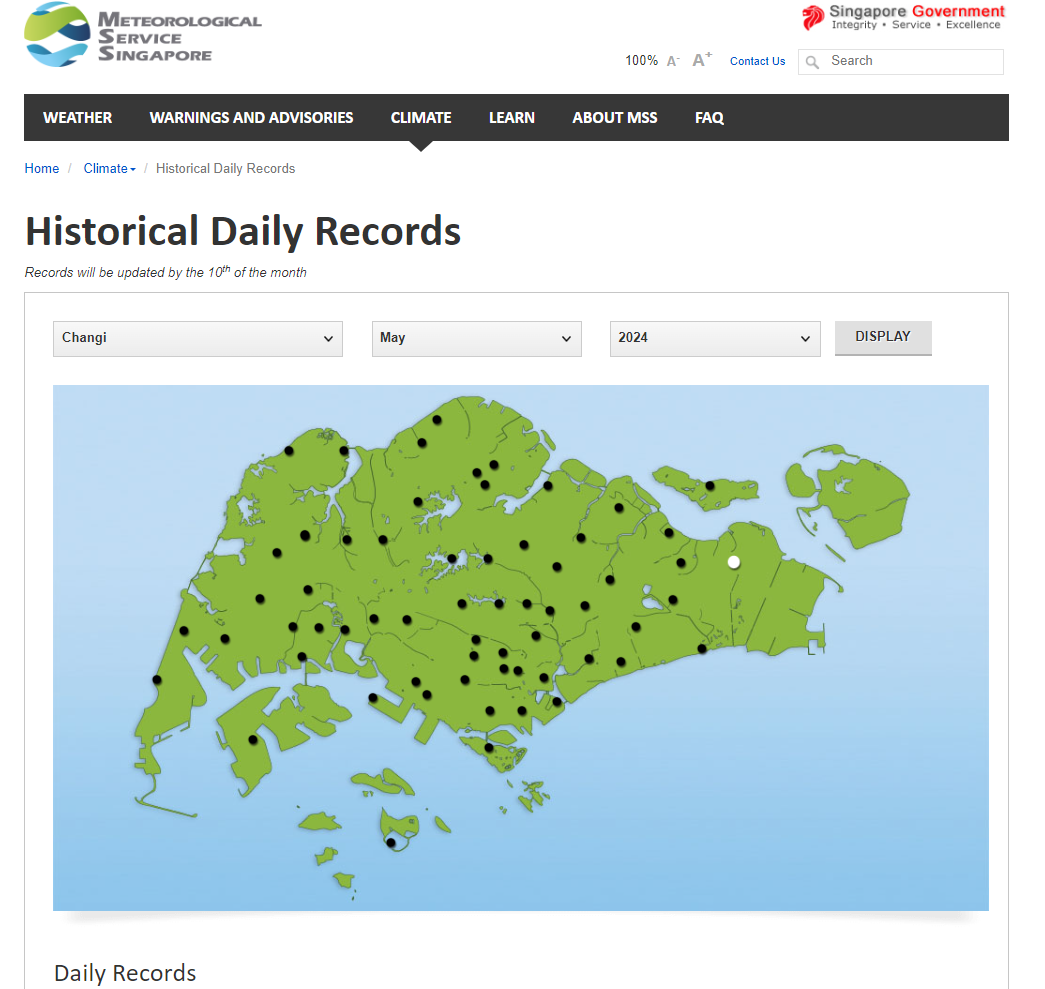

This notebook serves as an automated webscraping service to obtain historical weather data from http://www.weather.gov.sg/climate-historical-daily/

Do note that the data obtained may be messy and requires further processing as NEA changed it's data handling system midway.

This first code block is a hashtable to store the different start and end dates of the data, adjust accordingly

In [2]:
import datetime

# Function to get current month and year
def get_current_month_year():
    now = datetime.datetime.now()
    return now.strftime("%B"), now.year

# Update current month and year
month, year = get_current_month_year()

 # Define the rainfall dataset with start and end periods
rainfall_dataset = {
    'Paya Lebar': (['January', 1980], [month, year]), 
    'Tengah': (['January', 1980], [month, year]), 
    'Changi': (['January', 1981], [month, year]), 
    'Seletar': (['January', 1980], [month, year]), 
    'Tai Seng': (['January', 1980], [month, year]), 
    'Jurong (West)': (['January', 1980], [month, year]), 
    'Ang Mo Kio': (['September', 2009], [month, year]), 
    'Clementi': (['January', 1980], [month, year]), 
    'Admiralty': (['January', 2009], [month, year]), 
    'Sentosa Island': (['January', 1980], [month, year]), 
    'Sembawang': (['January', 1991], [month, year]), 
    'Boon Lay (East)': (['December', 2009], ['January', 2016]), 
    'Semakau Island': (['January', 2009], [month, year]), 
    'Pulau Ubin': (['January', 2009], [month, year]), 
    'East Coast Parkway': (['June', 2009], [month, year]), 
    'Marina Barrage': (['July', 2010], [month, year]), 
    'Newton': (['October', 2009], [month, year]), 
    'Tuas South': (['April', 2011], [month, year]), 
    'Pasir Panjang': (['March', 2010], [month, year]), 
    'Jurong Island': (['August', 2011], [month, year]), 
    'Choa Chu Kang (South)': (['April', 2011], [month, year]), 
    'Khatib': (['October', 2010], ['September', 2021]), 
    'Macritchie Reservoir': (['January', 1980], [month, year]), 
    'Lower Peirce Reservoir': (['January', 2010], [month, year]), 
    'Pasir Ris (West)': (['January', 1980], [month, year]), 
    'Kampong Bahru': (['January', 1980], ['October', 2016]), 
    'Jurong Pier': (['January', 1980], [month, year]), 
    'Ulu Pandan': (['January', 1980], [month, year]), 
    'Serangoon': (['January', 1980], [month, year]), 
    'Jurong (East)': (['January', 1980], ['September', 2014]), 
    'Mandai': (['January', 1980], [month, year]), 
    'Upper Thomson': (['January', 1980], ['December', 2020]), 
    'Buangkok': (['January', 1980], ['February', 2019]), 
    'Boon Lay (West)': (['January', 1980], ['December', 2017]), 
    'Bukit Panjang': (['January', 1980], [month, year]), 
    'Kranji Reservoir': (['January', 1983], ['November', 2015]), 
    'Tanjong Pagar': (['January', 2009], ['January', 2020]), 
    'Admiralty West': (['January', 2009], [month, year]), 
    'Queenstown': (['January', 1980], [month, year]), 
    'Tanjong Katong': (['December', 2009], [month, year]), 
    'Chai Chee': (['February', 2010], [month, year]), 
    'Upper Peirce Reservoir': (['January', 1980], [month, year]), 
    'Kent Ridge': (['March', 2009], [month, year]), 
    'Somerset': (['April', 2011], [month, year]), 
    'Punggol': (['June', 2009], [month, year]), 
    'Tuas West': (['March', 2009], [month, year]), 
    'Simei': (['January', 2009], [month, year]), 
    'Toa Payoh': (['March', 2010], [month, year]), 
    'Tuas': (['January', 2009], [month, year]), 
    'Bukit Timah': (['March', 2009], [month, year]), 
    'Yishun': (['May', 2009], ['March', 2021]), 
    'Buona Vista': (['March', 2009], [month, year]), 
    'Pasir Ris Central': (['March', 2009], ['December', 2018]), 
    'Jurong (North)': (['January', 1980], [month, year]), 
    'Choa Chu Kang (West)': (['June', 2009], ['April', 2017]), 
    'Serangoon North': (['January', 2010], [month, year]), 
    'Lim Chu Kang': (['May', 2009], [month, year]), 
    'Marine Parade': (['December', 2009], [month, year]), 
    'Choa Chu Kang (Central)': (['September', 2010], [month, year]), 
    'Dhoby Ghaut': (['September', 2010], [month, year]), 
    'Nicoll Highway': (['September', 2010], [month, year]), 
    'Botanic Garden': (['October', 2011], [month, year]),
    'Whampoa': (['January', 2014], [month, year])
}
    
print(month, year)

July 2024


## Mass download

This code block can be used to download all locations throughout the entire time period. Modifications such as only specific locations can be made via an if logic

This first block is the GUI to choose locations easily

If no custom date chooses, by default the entire date range will be downloaded. Do not be lazy, spell the months in full and first letter caps

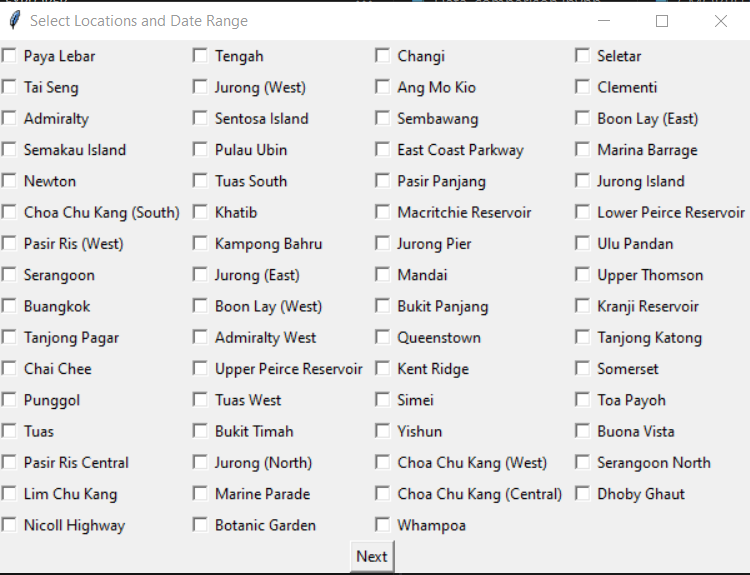

In [10]:
import tkinter as tk
from tkinter import messagebox

locations = []
start_month_input = ""
start_year_input = 0
end_month_input = ""
end_year_input = 0
date_boolean = False

# Function to confirm the date range selection
def confirm_dates():
    global start_month_input, start_year_input, end_month_input, end_year_input, date_boolean
    if date_boolean:
        start_month_input = start_month_var.get()
        start_year_input = int(start_year_var.get())
        end_month_input = end_month_var.get()
        end_year_input = int(end_year_var.get())
        
        if not start_month_input or not start_year_input or not end_month_input or not end_year_input:
            messagebox.showerror("Input Error", "Please enter all date range fields.")
            return
    else:
        start_month_input = ""
        start_year_input = 0
        end_month_input = ""
        end_year_input = 0
    
    # Close the main window after confirming the date range
    main_window.destroy()

# Function to show the date range selection frame
def show_date_selection():
    location_frame.pack_forget()
    date_frame.pack(fill="both", expand=True)

# Function to confirm the location selection
def select_locations():
    global locations
    locations = [location for location, var in checkbox_vars.items() if var.get()]
    
    if not locations:
        messagebox.showerror("Selection Error", "Please select at least one location.")
        return
    
    show_date_selection()

# Function to toggle date range inputs based on checkbox
def toggle_date_range():
    global date_boolean
    date_boolean = date_checkbox_var.get()
    state = tk.NORMAL if date_boolean else tk.DISABLED
    start_month_entry.config(state=state)
    start_year_entry.config(state=state)
    end_month_entry.config(state=state)
    end_year_entry.config(state=state)

# Create the main window
main_window = tk.Tk()
main_window.title("Select Locations and Date Range")

# Create frames for location and date selection
location_frame = tk.Frame(main_window)
date_frame = tk.Frame(main_window)

# Location selection frame
checkbox_vars = {}
columns = 4  # Number of columns for checkboxes
row = 0
column = 0

for location in rainfall_dataset.keys():
    var = tk.BooleanVar()
    checkbox = tk.Checkbutton(location_frame, text=location, variable=var)
    checkbox.grid(row=row, column=column, sticky='w')
    checkbox_vars[location] = var
    column += 1
    if column >= columns:
        column = 0
        row += 1

# Add a button to confirm the selection
btn_next = tk.Button(location_frame, text="Next", command=select_locations)
btn_next.grid(row=row + 1, column=0, columnspan=columns)

# Date range selection frame
tk.Label(date_frame, text="Start Month: (Full spelling)").grid(row=1, column=0, sticky='e')
start_month_var = tk.StringVar()
start_month_entry = tk.Entry(date_frame, textvariable=start_month_var, state=tk.DISABLED)
start_month_entry.grid(row=1, column=1)

tk.Label(date_frame, text="Start Year:").grid(row=2, column=0, sticky='e')
start_year_var = tk.StringVar()
start_year_entry = tk.Entry(date_frame, textvariable=start_year_var, state=tk.DISABLED)
start_year_entry.grid(row=2, column=1)

tk.Label(date_frame, text="End Month: (Full spelling)").grid(row=3, column=0, sticky='e')
end_month_var = tk.StringVar()
end_month_entry = tk.Entry(date_frame, textvariable=end_month_var, state=tk.DISABLED)
end_month_entry.grid(row=3, column=1)

tk.Label(date_frame, text="End Year:").grid(row=4, column=0, sticky='e')
end_year_var = tk.StringVar()
end_year_entry = tk.Entry(date_frame, textvariable=end_year_var, state=tk.DISABLED)
end_year_entry.grid(row=4, column=1)

# Add a checkbox for custom date range
date_checkbox_var = tk.BooleanVar()
date_checkbox = tk.Checkbutton(date_frame, text="Custom date range", variable=date_checkbox_var, command=toggle_date_range)
date_checkbox.grid(row=0, column=0, columnspan=2)
btn_confirm = tk.Button(date_frame, text="Confirm", command=confirm_dates)
btn_confirm.grid(row=5, column=0, columnspan=2)

# Show the location selection frame initially
location_frame.pack(fill="both", expand=True)
main_window.mainloop()

# variables will now contain the selected locations and date range
print(locations, start_month_input, start_year_input, end_month_input, end_year_input)

['Choa Chu Kang (West)']  0  0


## Download mechanism

After running GUI script, run this to automate downloading

IMPORTANT:

Put your desired file path and the code will automatically categorize by location

In [27]:
import os
import datetime
import pandas as pd
from collections import Counter
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Function to initialize the WebDriver
def initialize_driver(download_path):
    options = webdriver.ChromeOptions()
    prefs = {"download.default_directory": download_path}
    options.add_experimental_option("prefs", prefs)
    driver = webdriver.Chrome(options=options)
    return driver

# Function to select location
def select_location(driver, location):
    try:
        location_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, 'cityname'))
        )
        location_button.click()
        location_option = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f'//ul[@class="dropdown-menu long-dropdown"]/li/a[contains(text(), "{location}")]'))
        )
        location_option.click()
    except Exception as e:
        print(f"Error selecting location: {e}")

# Function to select year
def select_year(driver, year):
    try:
        year_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, 'year'))
        )
        year_button.click()
        year_option = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f'//ul[@class="dropdown-menu"]/li/a[text()="{year}"]'))
        )
        year_option.click()
    except Exception as e:
        print(f"Error selecting year {year}: {e}")

# Function to select month
def select_month(driver, month):
    max_retries = 3
    for attempt in range(max_retries):
        try:
            # Click the month dropdown button
            month_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.ID, 'month'))
            )
            month_button.click()
            
            # Select the month from the dropdown
            month_option = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, f'//ul[@class="dropdown-menu"]/li/a[text()="{month}"]'))
            )
            month_option.click()
            
            # Verify the correct month is selected
            selected_month = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.ID, 'month'))
            ).text.strip()
            
            if selected_month == month:
                print(f"Successfully selected month: {selected_month}")
                return True
            else:
                print(f"Month not correctly selected. Attempt {attempt + 1} of {max_retries}")
                time.sleep(1)
        except Exception as e:
            print(f"Error selecting month {month}: {e}. Retrying... ({attempt + 1}/{max_retries})")
            time.sleep(1)
    
    print(f"Failed to select month {month} after {max_retries} attempts.")
    return False

# Function to click the display button
def click_display(driver):
    try:
        display_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, 'display'))
        )
        display_button.click()
    except Exception as e:
        print(f"Error clicking display button: {e}")

# Function to download CSV
def download_csv(driver):
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'tableContainer'))
        )
        csv_download_link = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.LINK_TEXT, 'CSV'))
        )
        csv_download_link.click()
    except Exception as e:
        print(f"Error clicking CSV download link: {e}")

# Main function to automate the process
def automate_weather_data(location, start_year, end_year, start_month, end_month, download_path):
    driver = initialize_driver(download_path)
    url = 'http://www.weather.gov.sg/climate-historical-daily/'
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'cityname')))
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    start_month_index = months.index(start_month)
    end_month_index = months.index(end_month)

    for year in range(start_year, end_year + 1):
        for month_index in range(12):
            if (year == start_year and month_index < start_month_index) or (year == end_year and month_index > end_month_index):
                continue
            print(f"Downloading data for {location} - {months[month_index]} {year}")
            select_location(driver, location)
            time.sleep(1)
            select_year(driver, year)
            time.sleep(1)
            select_month(driver, months[month_index])
            time.sleep(1)
            click_display(driver)
            time.sleep(2)
            download_csv(driver)
            time.sleep(2)
    driver.quit()

nea_folder = r"C:\Users\userAdmin\Desktop\NEA rain files"
#The variables here will be named from the GUI interface
for location in locations:
    # Create a subfolder for each location
    location_folder = os.path.join(nea_folder, location)
    os.makedirs(location_folder, exist_ok=True)
    if date_boolean:
        start_month, start_year = start_month_input, start_year_input
        end_month, end_year = end_month_input, end_year_input
    else:   
        start_month, start_year = rainfall_dataset[location][0]
        end_month, end_year = rainfall_dataset[location][1]
    print(location, start_month, start_year, end_month, end_year)
    automate_weather_data(location, start_year, end_year, start_month, end_month, location_folder)


Mandai April 1992 April 1992
Successfully selected month: April
Bukit Panjang April 1992 April 1992
Successfully selected month: April


Use this next code block to shift files from download to subfolder ONLY IF U HAVE DOWNLOADED MANUALLY

In [ ]:
import os
import shutil
import re
import pandas as pd

# Define the source directory and target directory
source_dir = r'C:\Users\userAdmin\Downloads'  # Replace with your source directory
target_dir = r'C:\Users\userAdmin\Desktop\NEA rain files'  # Replace with your target directory

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Regular expression to match station numbers
station_pattern = re.compile(r'S(\d{2,3})')

# Dictionary to track renamed folders
renamed_folders = {}

# Process each file in the source directory
for filename in os.listdir(source_dir):
    if filename.startswith('DAILYDATA_'):
        match = station_pattern.search(filename)
        if match:
            station_number = match.group(1)
            station_folder = f'S{station_number}'
            
            # Check if the folder has been renamed
            if station_folder in renamed_folders:
                station_folder_path = renamed_folders[station_folder]
            else:
                station_folder_path = os.path.join(target_dir, station_folder)
            
            # Create the station subfolder if it doesn't exist
            os.makedirs(station_folder_path, exist_ok=True)
            
            # Move the file to the station subfolder
            source_file_path = os.path.join(source_dir, filename)
            target_file_path = os.path.join(station_folder_path, filename)
            shutil.move(source_file_path, target_file_path)
            print(f'Moved {filename} to {station_folder_path}')
            
            # Check for the first CSV file and get the station name
            if filename.endswith('.csv') and not os.path.exists(f"{station_folder_path}.done"):
                excel_file_path = os.path.join(station_folder_path, filename)
                try:
                    # Try reading the file with different encodings if necessary
                    encodings = ['utf-8', 'latin1', 'iso-8859-1']
                    for encoding in encodings:
                        try:
                            df = pd.read_csv(excel_file_path, encoding=encoding)
                            break
                        except UnicodeDecodeError:
                            continue
                    else:
                        raise UnicodeDecodeError("None of the encodings worked.")
                    
                    if 'Station' in df.columns:
                        station_name = df['Station'].iloc[0]
                        
                        # New station folder path
                        new_station_folder = f"{station_name} S{station_number}"
                        new_station_folder_path = os.path.join(target_dir, new_station_folder)
                        
                        # Rename the station folder if the new name doesn't exist
                        if not os.path.exists(new_station_folder_path):
                            os.rename(station_folder_path, new_station_folder_path)
                            renamed_folders[station_folder] = new_station_folder_path
                            print(f"Renamed {station_folder_path} to {new_station_folder_path}")
                        
                        # Mark this folder as processed
                        open(f"{new_station_folder_path}.done", 'w').close()
                except Exception as e:
                    print(f"Error processing file {filename}: {e}")

print('Files have been organized into their respective station subfolders.')


## Code to run through downloaded CSVs, check missing files and download them

** deprecated **

Requires update

In [ ]:

location = "Serangoon North" #<--- Change this to the location of interest
code = "S110" #<--- Change this to the location code

folder_path = f'C:/Users/userAdmin/Desktop/NEA_Data/{location} ({code})'  # Update with your folder path
filenames = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        filenames.append(filename)
for filename in filenames:
    if "(" in filename:
        file_path = os.path.join(folder_path, filename)
        os.remove(file_path)

filenames = [filename for filename in filenames if "(" not in filename]
file_counts = Counter(filenames)
duplicates = [filename for filename, count in file_counts.items() if count > 1]

# Delete duplicate files and keep one
for filename in duplicates:
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f == filename]
    # Keep the first occurrence and delete the rest
    for file_path in file_paths[1:]:
        os.remove(file_path)
        print(f"Deleted duplicate file: {file_path}")

# Identify missing files
expected_files = set()
print(rainfall_dataset[location][0][1])
years = range(rainfall_dataset[location][0][1], rainfall_dataset[location][1][1]+1)  # Assuming you want files from 1981 to 2021
months = range(1, 13)  # 1 to 12 for January to December

for year in years:
    for month in months:
        if year == 2024 and (month >4):
            break
        expected_files.add(f"DAILYDATA_{code}_{year}{str(month).zfill(2)}.csv")

existing_files = set(filenames) - set(duplicates)
missing_files = expected_files - existing_files

# Print missing files
if missing_files:
    print("Missing files: " + str(len(missing_files)))
    for missing_file in sorted(missing_files):
        print(missing_file)
else:
    print("No files are missing.")

# Function to initialize the WebDriver
def initialize_driver(download_path):
    options = webdriver.ChromeOptions()
    prefs = {"download.default_directory": download_path}
    options.add_experimental_option("prefs", prefs)
    driver = webdriver.Chrome(options=options)
    return driver

# Function to select location
def select_location(driver, location):
    try:
        location_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, 'cityname'))
        )
        location_button.click()
        location_option = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f'//ul[@class="dropdown-menu long-dropdown"]/li/a[contains(text(), "{location}")]'))
        )
        location_option.click()
    except Exception as e:
        print(f"Error selecting location: {e}")

# Function to select year
def select_year(driver, year):
    try:
        year_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, 'year'))
        )
        year_button.click()
        year_option = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f'//ul[@class="dropdown-menu"]/li/a[text()="{year}"]'))
        )
        year_option.click()
    except Exception as e:
        print(f"Error selecting year {year}: {e}")

# Function to select month
def select_month(driver, month):
    try:
        month_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, 'month'))
        )
        month_button.click()
        month_option = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f'//ul[@class="dropdown-menu"]/li/a[text()="{month}"]'))
        )
        month_option.click()
    except Exception as e:
        print(f"Error selecting month {month}: {e}")

# Function to verify the selected month
def verify_month_selected(driver, month):
    try:
        selected_month = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'month'))
        )
        return month in selected_month.text
    except Exception as e:
        print(f"Error verifying month selection: {e}")
        return False

# Function to click the display button
def click_display(driver):
    try:
        display_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.ID, 'display'))
        )
        display_button.click()
    except Exception as e:
        print(f"Error clicking display button: {e}")

# Function to download CSV
def download_csv(driver):
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'tableContainer'))
        )
        csv_download_link = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.LINK_TEXT, 'CSV'))
        )
        csv_download_link.click()
    except Exception as e:
        print(f"Error clicking CSV download link: {e}")

# Function to automate the process of downloading missing files
def automate_weather_data(download_path, location, missing_files):
    driver = initialize_driver(download_path)
    url = 'http://www.weather.gov.sg/climate-historical-daily/'
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'cityname')))
    
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    for missing_file in missing_files:
        year = missing_file[-10:-6]
        print(year)
        month = months[int(missing_file[-6:-4]) - 1]
        print(month+" "+ year)

        select_location(driver, location)
        time.sleep(1)
        select_year(driver, year)
        time.sleep(1)
        select_month(driver, month)
        time.sleep(1)

        if verify_month_selected(driver, month):
            click_display(driver)
            time.sleep(2)
            download_csv(driver)
            time.sleep(4)
        else:
            print(f"Month {month} was not correctly selected. Skipping download.")

    driver.quit()

# Parameters
download_path = "lll"  # Change this to your desired download path

if missing_files:
    automate_weather_data(download_path, location, missing_files)

print("Files containing '(' have been deleted, duplicate files have been deleted, and missing files have been listed.")
